In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\steph\\Downloads\\heart_disease.csv")
df
# age: Age of the individual
# sex: Gender of the individual (0 = female, 1 = male)
# chest pain type: Type of chest pain (4 categories: 0-3)
# resting blood pressure: Resting blood pressure (in mm Hg)
# serum cholesterol: Cholesterol level (in mg/dl)
# fasting blood sugar: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
# resting electrocardiographic results: ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable/definite left ventricular hypertrophy)
# maximum heart rate achieved
# exercise induced angina: Exercise-induced chest pain (1 = yes, 0 = no)
# oldpeak: ST depression induced by exercise relative to rest
# slope: The slope of the peak exercise ST segment (0-2)
# number of major vessels: Number of major vessels (0-3) colored by fluoroscopy
# thal: Type of thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
# target: Presence of heart disease (1 = Yes, 0 = No)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.shape

(1025, 14)

In [11]:
# Checking missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values present in this dataset.

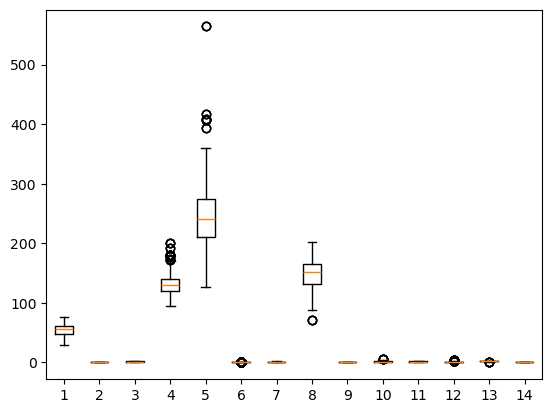

In [13]:
# Checking outliers
plt.boxplot(df)
plt.show()

In [15]:
def remove_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3 + 1.5 *iqr
    lower_bound=q1 - 1.5 *iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [17]:
for col in df:
    df[col]=remove_outliers(df,col)

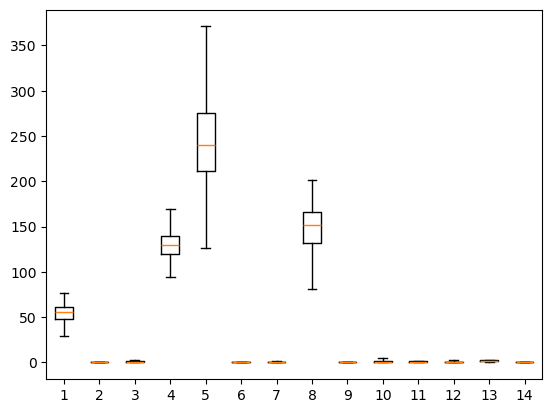

In [19]:
plt.boxplot(df)
plt.show()

In [21]:
cat_df=df[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']]
num_df=df[['age','trestbps','chol','thalach','oldpeak']]

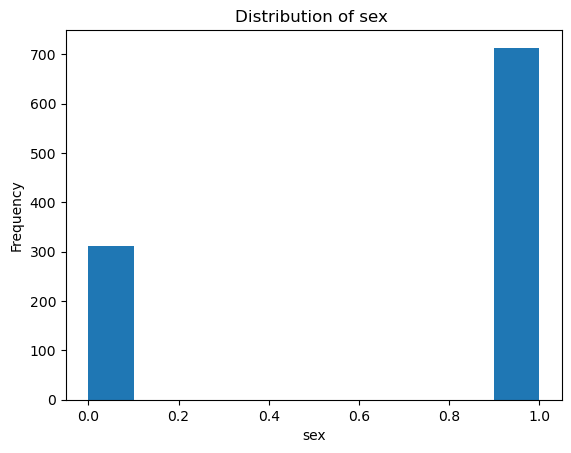

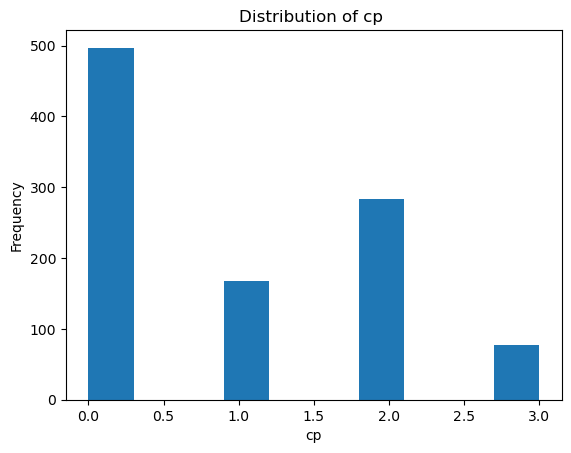

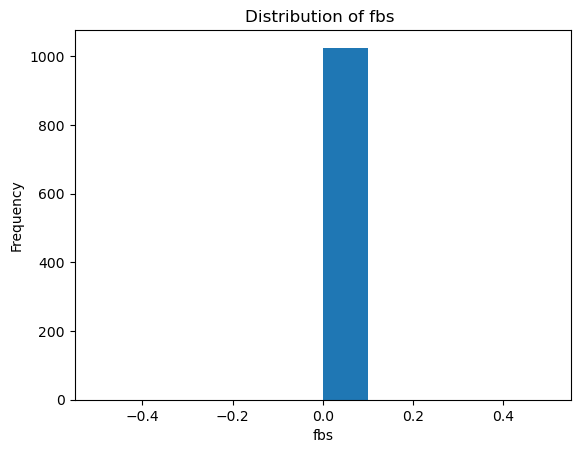

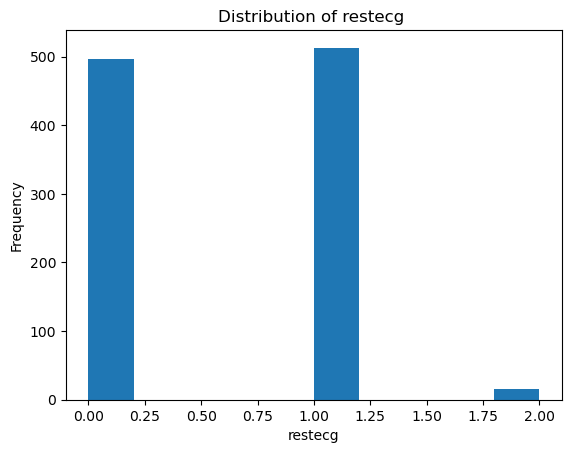

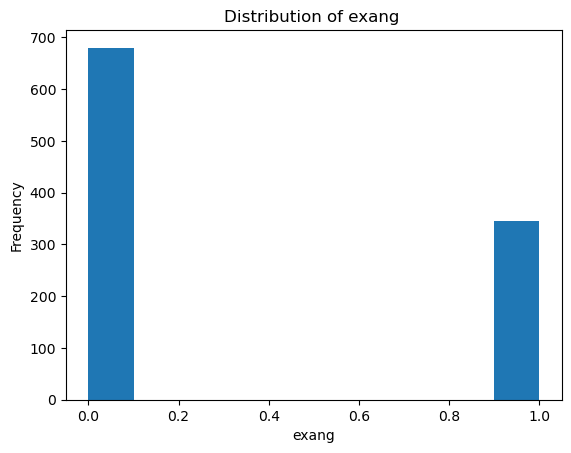

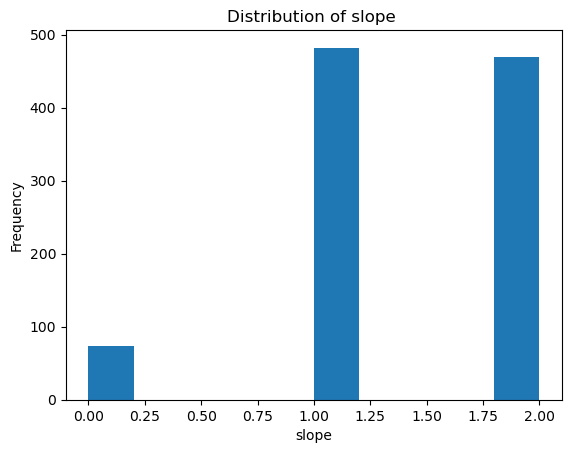

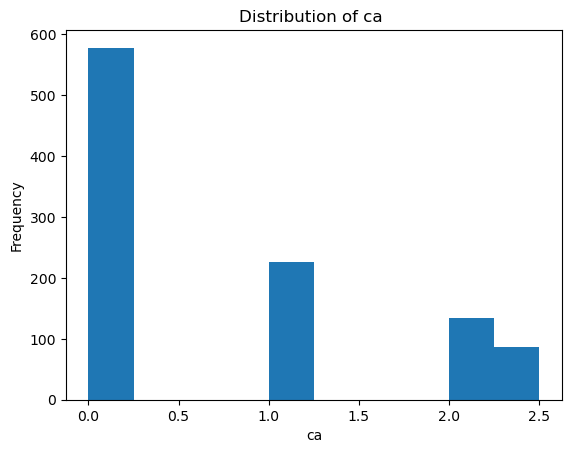

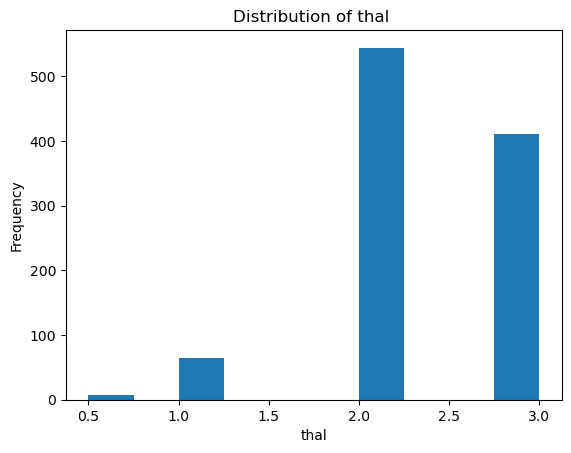

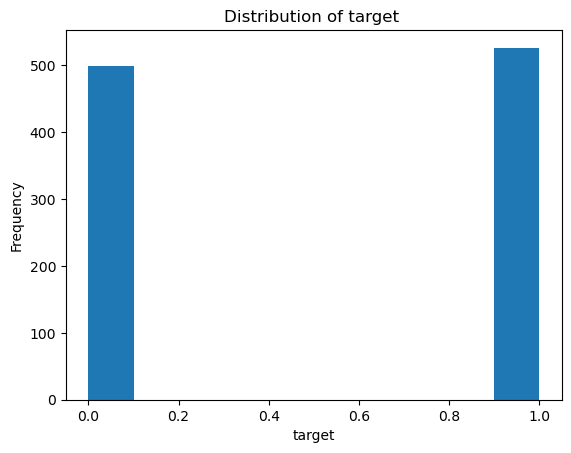

In [31]:
# To check the distribution of the categorical columns
for col in cat_df:
    plt.hist(cat_df[col])
    plt.title("Distribution of {} ".format(col))
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [35]:
print(pd.unique(cat_df['sex']))
print(pd.unique(cat_df['cp']))
print(pd.unique(cat_df['fbs']))
print(pd.unique(cat_df['restecg']))
print(pd.unique(cat_df['exang']))
print(pd.unique(cat_df['slope']))
print(pd.unique(cat_df['ca']))
print(pd.unique(cat_df['thal']))
print(pd.unique(cat_df['target']))

[1 0]
[0 1 2 3]
[0]
[1 0 2]
[0 1]
[2 0 1]
[2.  0.  1.  2.5]
[3.  2.  1.  0.5]
[0 1]


In [37]:
print(len(cat_df[cat_df['thal']==3]))
print(len(cat_df[cat_df['thal']==2]))
print(len(cat_df[cat_df['thal']==1]))
print(len(cat_df[cat_df['thal']==0.5]))

410
544
64
7


In [39]:
# clipping 0 becuz its a minority and an anomaly

cat_df.loc[cat_df['thal'] == 0.5, 'thal'] = 1
print(len(cat_df[cat_df['thal']==3]))
print(len(cat_df[cat_df['thal']==2]))
print(len(cat_df[cat_df['thal']==1]))
print(len(cat_df[cat_df['thal']==0]))

410
544
71
0


In [41]:
# Min Max Scaling
from sklearn.preprocessing import MinMaxScaler

In [43]:
min_max_scalar= MinMaxScaler(feature_range=(0,1))
df[['trestbps_min_max_scaled','chol_min_max_scaled','thalach_min_max_scaled','oldpeak_min_max_scaled']] = min_max_scalar.fit_transform(df[['trestbps','chol','thalach','oldpeak']])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_min_max_scaled,chol_min_max_scaled,thalach_min_max_scaled,oldpeak_min_max_scaled
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0,0.407895,0.351020,0.719008,0.222222
1,53,1,0,140,203,0,0,155,1,3.1,0,0.0,3.0,0,0.605263,0.314286,0.611570,0.688889
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0,0.671053,0.195918,0.363636,0.577778
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0,0.710526,0.314286,0.661157,0.000000
4,62,0,0,138,294,0,1,106,0,1.9,1,2.5,2.0,0,0.578947,0.685714,0.206612,0.422222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0.0,2.0,1,0.605263,0.387755,0.685950,0.000000
1021,60,1,0,125,258,0,0,141,1,2.8,1,1.0,3.0,0,0.407895,0.538776,0.495868,0.622222
1022,47,1,0,110,275,0,0,118,1,1.0,1,1.0,2.0,0,0.210526,0.608163,0.305785,0.222222
1023,50,0,0,110,254,0,0,159,0,0.0,2,0.0,2.0,1,0.210526,0.522449,0.644628,0.000000


In [45]:
# Train Test Split for Regression
from sklearn.model_selection import train_test_split
y=num_df['chol'] 
X=num_df.drop('chol',axis=1)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [52]:
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
y_pred=reg_lin.predict(X_test)

In [55]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Sqaured Error:",mse)
print("Mean Absolute Error:",mae)
print("R Squared:",r2)

Mean Sqaured Error: 2032.3530594166095
Mean Absolute Error: 35.853445666241534
R Squared: 0.06844261833039811


In [116]:
# Train Test Split for Classification
y=cat_df['target'] 
X=cat_df.drop('target',axis=1)

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,precision_score,confusion_matrix


In [122]:
# Logistic Regression
model = LogisticRegression() # create the object
model.fit(X,y)

LogisticRegression()

In [124]:
y_pred = model.predict(X_test)

In [126]:
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test, average="weighted")

In [128]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8292682926829268
F1 Score: 0.829536655651393
Recall: 0.8292682926829268
Precision: 0.834583042973287


In [130]:
# KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [132]:
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test, average="weighted")

In [134]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8439024390243902
F1 Score: 0.8442902961139703
Recall: 0.8439024390243902
Precision: 0.8472473867595819


In [136]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [138]:
y_pred=model.predict(X_test)

In [140]:
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test, average="weighted")

In [142]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8439024390243902
F1 Score: 0.8438875810802653
Recall: 0.8439024390243902
Precision: 0.8445156794425088
